# SciPy
Numpy provides a high-performance multidimensional array and basic tools to compute with and manipulate these arrays. <a href="https://docs.scipy.org/doc/scipy/reference/index.html" target="_blank">**`SciPy`**</a>
builds on this, and provides a large number of functions that operate on numpy arrays and are useful for different types of scientific and engineering applications.  

## Image operations
SciPy provides some basic functions to work with images. For example, it has functions to read images from disk into numpy arrays, to write numpy arrays to disk as images, and to resize images. Here is a simple example that showcases these functions:

In [24]:
# from scipy.misc import imread, imsave, imresize
# from scipy.misc.pilutil import imread
import cv2

# Read an JPEG image into a numpy array
img = cv2.imread('assets/cat.jpg')
print(img.dtype, img.shape)

# We can tint the image by scaling each of the color channels
# by a different scalar constant. The image has shape (400, 248, 3);
# we multiply it by the array [1, 0.95, 0.9] of shape (3,);
# numpy broadcasting means that this leaves the red channel unchanged,
# and multiplies the green and blue channels by 0.95 and 0.9 respectively
img_tinted = img * [1, 0.95, 0.9]

# Resize (img_tinted, (300, 300))
# img_tinted = cv2.imresize(img_tinted, (300, 300))

# Write the tinted image back to disk
# imsave = ('assets/cat_tinted.jpg', image)

uint8 (400, 248, 3)


## MATLAB files
The functions `scipy.io.loadmat` and `scipy.io.savemat` allow us to read and write MATLAB files. We can read about them <a href="https://docs.scipy.org/doc/scipy/reference/io.html" target="_blank">in the documentation</a>.

### Distance between points
SciPy defines some useful functions for computing distances between sets of points.

The function `scipy.spatial.distance.pdist` computes the distance between all pairs of points in a given set:

In [30]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Create an array where each row is a point in 2D space:
x = np.array([[0, 1], [1, 0], [2, 0]])
print(x)

# Compute the Euclidean distance between all rows of x.
# d[i, j] is the Euclidean distance between x[i, :] and x[j, :],
# and d is the following array:
d = squareform(pdist(x, 'euclidean'))
print(d)

[[0 1]
 [1 0]
 [2 0]]
[[0.         1.41421356 2.23606798]
 [1.41421356 0.         1.        ]
 [2.23606798 1.         0.        ]]


> **all the details about this function in the documentation.
    <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html" target="_blank">in the documentation</a>.**

A similar function (`scipy.spatial.distance.cdist`) computes the distance between all pairs across two sets of points; we can read about it <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html" target="_blank">in the documentation</a>.

## Matplotlib
<a href="https://matplotlib.org/" target="_blank">Matplotlib</a> is a plotting library.  In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

### Plotting
The most important function in matplotlib is `plot`, which allows us to plot 2D data. Here is a simple example:

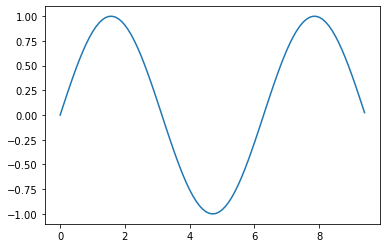

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

# We must call plt.show() to make graphics appear.
plt.show()

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

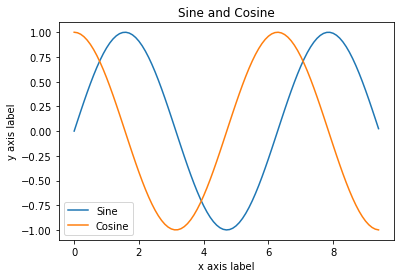

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinats for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

> much more about the `plot` function
    <a href="https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot" target="_blank">in the documentation</a>.

### Subplots
We can plot different things in the same figure using the `subplot` function. Here is an example:

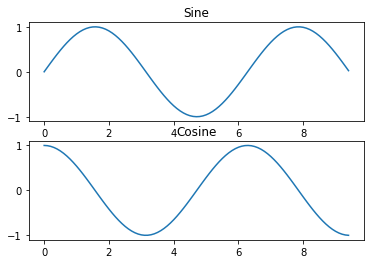

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure
plt.show()

> much more about the `subplot` function
    <a href="https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot" target="_blank">in the documentation</a>.

### Images
We can use the imshow function to show images. Here is an example:

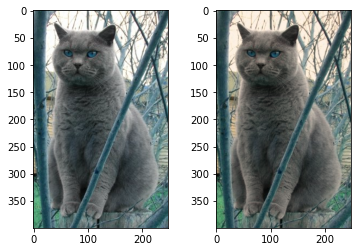

In [60]:
import numpy as np
# from scipy.misc import imread, imresize
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('assets/cat.jpg')
img_tinted = img * [1, 0.95, 0.9]

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img)

# Show the tinted image
plt.subplot(1, 2, 2)

# A slight gotcha with imshow is that it might give strange results
# if presented with data that is not uint8. To work around this, we
# explicitly cast the image to uint8 before displaying it.
plt.imshow(np.uint8(img_tinted))
plt.show()